In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Optional: suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
import pandas as pd

def check_data_quality(df):
    """
    Checks a Pandas DataFrame for missing values and duplicate rows.
    Prints a summary report.
    """
    print("=" * 40)
    print("       DATA QUALITY CHECK       ")
    print("=" * 40)
    
    # 1. Check Dimensions
    print(f"Total Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
    
    # 2. Check Duplicates
    duplicate_count = df.duplicated().sum()
    duplicate_pct = (duplicate_count / len(df)) * 100
    print("-" * 40)
    print(f"Duplicate Rows: {duplicate_count} ({duplicate_pct:.2f}%)")
    
    # 3. Check Missing Values
    missing_count = df.isnull().sum()
    missing_pct = (df.isnull().sum() / len(df)) * 100
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_pct
    })
    
    # Filter to show only columns with missing values
    missing_only = missing_summary[missing_summary['Missing Count'] > 0]
    
    print("-" * 40)
    if not missing_only.empty:
        print("Columns with Missing Values:")
        print(missing_only.sort_values(by='Missing Count', ascending=False))
    else:
        print("No missing values found.")
    
    print("=" * 40)

# --- Usage Example ---
# check_data_quality(your_dataframe_name)

In [35]:
# Try latin1 or ISO-8859-1 if the standard load fails
df2 = pd.read_csv('archive/housing.csv', encoding='latin1')
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df1=pd.read_csv('archive/Walmart_Sales.csv', encoding='latin1')
df1.head()

In [36]:
df3=pd.read_csv('archive/titanic.csv')
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
check_data_quality(df3)

       DATA QUALITY CHECK       
Total Rows: 891
Total Columns: 12
----------------------------------------
Duplicate Rows: 0 (0.00%)
----------------------------------------
Columns with Missing Values:
          Missing Count  Missing %
Cabin               687  77.104377
Age                 177  19.865320
Embarked              2   0.224467


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
# 1. Check where the holes are
print(df3.isnull().sum())

# 2. FILL: The 'Age' column has missing values. 
# Let's fill them with the average (mean) age so we don't lose rows.
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())

# 3. DROP: The 'Cabin' column is mostly empty. 
# Let's drop the whole column because it's too messy to fix.
df = df3.drop(columns=['Cabin'])

# 4. DROP ROWS: If 'Embarked' has only 2 missing values, just delete those 2 rows.
df = df.dropna(subset=['Embarked'])

print("Missing values after cleaning:", df.isnull().sum().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values after cleaning: 0


In [51]:
# Goal: Find all passengers who paid a fare greater than 50
high_fare_df = df[df['Fare'] > 50]

# Goal: Find all female passengers in 1st class
# Use & for 'and' | for 'or'
first_class_women = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

print(f"Total High Fare Passengers: {len(high_fare_df)}")
print(f"Total 1st Class Women: {len(first_class_women)}")

Total High Fare Passengers: 158
Total 1st Class Women: 92


In [52]:
# Logic: Split the data by 'Sex', then take the 'Survived' column and find the mean.
survival_by_gender = df.groupby('Sex')['Survived'].mean()

print("Survival Rate by Gender:")
print(survival_by_gender)

# Logic: Split by Class, then look at the average Fare paid
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean()

print("\nAverage Fare by Class:")
print(avg_fare_by_class)

Survival Rate by Gender:
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Average Fare by Class:
Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64


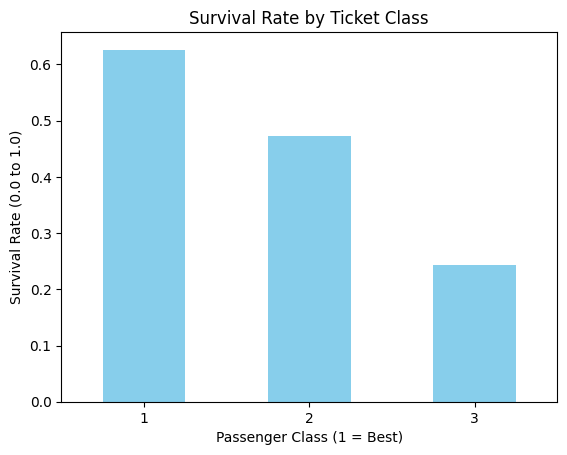

In [53]:
import matplotlib.pyplot as plt

# Create a bar chart of survival rates by class
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='skyblue')

# Add labels to make it professional
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Passenger Class (1 = Best)')
plt.ylabel('Survival Rate (0.0 to 1.0)')
plt.xticks(rotation=0) # Keeps the numbers on the bottom upright

# Show the plot
plt.show()